In [162]:
# EXAMEN PRIMER PARCIAL
# DATASET QUE ME TOCO: 	Bengaluru House price data
# 	https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

# MIRANDA GUTIERREZ CESAR ALVARO
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [163]:
# Importar la biblioteca pandas y se le asigna el alias "pd" para facilitar su uso
import pandas as pd

# Importar la clase LabelEncoder desde el módulo sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Importar la clase datetime desde el módulo datetime
from datetime import datetime


In [164]:
# Importar la biblioteca pandas y usar la función read_csv para cargar datos desde un archivo CSV
# El archivo CSV se encuentra en la ruta '/content/Bengaluru_House_Data.csv'
data = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [165]:
print(data)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Be

In [166]:
# imprimir tamanios
data.shape

(13320, 9)

In [167]:
#imprimir informacion de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [168]:
#CONVERTIR VARIABLES CATEGORICAS A ENTEROS (no modificar)
#variables categoricas, contiene las listas de las columnas de data que tienen tipo de dato object.
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  #usa labelencoder para crear objeto llamado le, que permite transformar valores categoricos a enteros.
  le = LabelEncoder()
  # usa lift_transform del objeto le para ajustar el codificador a los valores de la columna y devolver una serie d enumero enteros
  data[columna] = le.fit_transform(data[columna])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  int64  
 2   location      13320 non-null  int64  
 3   size          13320 non-null  int64  
 4   society       13320 non-null  int64  
 5   total_sqft    13320 non-null  int64  
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 936.7 KB


In [169]:
#RELLENAR DATOS (si modificar)
#asignar las columnas incompletas. (modificar solo esto)
columnas_especificas = ['bath', 'balcony']
#sacar la media de toda la columna y con ese valor llenar esos datos vacios.
media_columnas = data[columnas_especificas].mean()
#llenar
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  int64  
 2   location      13320 non-null  int64  
 3   size          13320 non-null  int64  
 4   society       13320 non-null  int64  
 5   total_sqft    13320 non-null  int64  
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 936.7 KB


In [170]:
# Lectura de Datos: 8 columnas para x y la ultima columan para y
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [171]:
print(X)
print('*'*25)
print(y)

       area_type  availability  location  size  society  total_sqft  bath  \
0              3            40       419    13      464          70   2.0   
1              2            80       317    19     2439        1288   5.0   
2              0            80      1179    16     2688         514   2.0   
3              3            80       757    16     2186         602   3.0   
4              3            80       716    13     2688         239   2.0   
...          ...           ...       ...   ...      ...         ...   ...   
13315          0            80      1252    22      209        1499   4.0   
13316          3            80      1004    18     2688        1535   5.0   
13317          0            80       972    13     1216         172   2.0   
13318          3            32       907    18     2205        1680   4.0   
13319          3            80       396     0     2688        1747   1.0   

        balcony  
0      1.000000  
1      3.000000  
2      3.000000  
3  

In [172]:
# Definir una función para normalizar características en un rango específico, en este caso, de 0 a 1
def normalizarCaracteristicas(X):
    # Crear una copia de la matriz de características para evitar modificar la original
    X_norm = X.copy()

    # Inicializar vectores para la media (mu) y la desviación estándar (sigma)
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcular la media y la desviación estándar de cada columna de la matriz de características
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Normalizar las características restando la media y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma

    # Devolver la matriz de características normalizada, la media y la desviación estándar
    return X_norm, mu, sigma


In [173]:
# CALCULAR X_NOM, MEDIA Y DESVIACION ESTANDAR (no modificar)
X_norm, mu, sigma = normalizarCaracteristicas(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       area_type  availability  location  size  society  total_sqft  bath  \
0              3            40       419    13      464          70   2.0   
1              2            80       317    19     2439        1288   5.0   
2              0            80      1179    16     2688         514   2.0   
3              3            80       757    16     2186         602   3.0   
4              3            80       716    13     2688         239   2.0   
...          ...           ...       ...   ...      ...         ...   ...   
13315          0            80      1252    22      209        1499   4.0   
13316          3            80      1004    18     2688        1535   5.0   
13317          0            80       972    13     1216         172   2.0   
13318          3            32       907    18     2205        1680   4.0   
13319          3            80       396     0     2688        1747   1.0   

        balcony  
0      1.000000  
1      3.000000  
2      3.000000  
3  

In [174]:

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [175]:

print(X)

[[ 1.          0.62046076 -1.67893016 ... -1.09913768 -0.51775126
  -0.73199725]
 [ 1.         -0.25381591  0.48177474 ...  0.83272673  1.72485942
   1.77323081]
 [ 1.         -2.00236924  0.48177474 ... -0.39491125 -0.51775126
   1.77323081]
 ...
 [ 1.         -2.00236924  0.48177474 ... -0.93735593 -0.51775126
  -0.73199725]
 [ 1.          0.62046076 -2.11107115 ...  1.4544762   0.97732252
  -0.73199725]
 [ 1.          0.62046076  0.48177474 ...  1.56074461 -1.26528816
  -0.73199725]]


In [176]:
print(X)

[[ 1.          0.62046076 -1.67893016 ... -1.09913768 -0.51775126
  -0.73199725]
 [ 1.         -0.25381591  0.48177474 ...  0.83272673  1.72485942
   1.77323081]
 [ 1.         -2.00236924  0.48177474 ... -0.39491125 -0.51775126
   1.77323081]
 ...
 [ 1.         -2.00236924  0.48177474 ... -0.93735593 -0.51775126
  -0.73199725]
 [ 1.          0.62046076 -2.11107115 ...  1.4544762   0.97732252
  -0.73199725]
 [ 1.          0.62046076  0.48177474 ...  1.56074461 -1.26528816
  -0.73199725]]


In [177]:
# CALCULAR LA 'Y' (no modificar)
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #la formula de costo, hipotesis
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [178]:
#aqui estoy poniendo los valroes para theta.
# la cantidad de theta es igual a numero de columnas de dataset original
theta=np.array([0.1, 5.0, 0.1, 0.1, 5.0, 0.1, 0.1, 5.0, 0.1])
JJ = calcularCosto(X, y, theta)
# con esso thetas obtenemos un costo.
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1] se obtiene un costo de: 16919.312953221746


In [179]:
# FUNCION DESCENSO GRADIENTE 1ER METODO (no modificar)
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [180]:
# INICIALIZAR VALORES,
# Elige un valor para el parámetro alpha, que es la tasa de aprendizaje del algoritmo del descenso por el gradiente.
alpha = 0.01
# Este valor determina el número de veces que se actualizan los parámetros theta en dirección opuesta al gradiente o pendiente de la función de costo o error.
num_ite = 10000
#inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)

 1RA RESPUESTA: LOS VALORES DE THETAS CON DESCENSO POR EL GRADIENTE. SON: [112.5656265    0.79576564  -1.05473899   1.35881783  15.18466776
  -0.20907301  26.46830521  52.45362479   3.92363648]
con un costo de: 8461.464101602976 


Text(0, 0.5, 'Ventas de Salida')

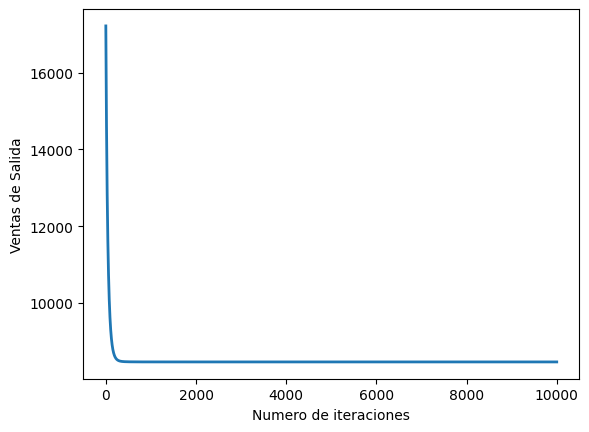

In [181]:
theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f" 1RA RESPUESTA: LOS VALORES DE THETAS CON DESCENSO POR EL GRADIENTE. SON: { theta }")
print(f"con un costo de: { J_historico[-1]} ")
# Grafica la convergencia del costo
# Grafica la convergencia del costo utilizando la librería pyplot. Para hacer esto, utiliza el método plot para dibujar una línea que conecta los puntos formados por el número de iteraciones (np.arange(len(J_history))) y el valor del costo (J_history).
# El parámetro lw=2 indica que el grosor de la línea es 2. Luego, utiliza los métodos xlabel e ylabel para asignar etiquetas a los ejes horizontal y vertical,
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Ventas de Salida')

In [182]:
# DAR VALORES A Xs:
# el primer valor de X0 es 1 esto es ctte, los otros valores de Xs se modifica, (aqui no se cuenta la columna de 'Y")
# para asignar valores fijarse los valores de
X_array = [1,5,1,0.1,9,5,3,3,3]

In [183]:
# CALCULAR 'Y' POR EL METODO DE DESCENSO POR EL GRADIENTE
#ingresar los valores de Xs
y_predDesGrad = np.dot(X_array,theta)
print('1RA RESPUESTA: El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(y_predDesGrad))

1RA RESPUESTA: El valor predecido es (usando el descenso por el gradiente): 499.7789


In [184]:
# CALCULO DE THETAS PO METODO DE ECUACION DE LA NORMAL: SEGUNDO METODO (no modificar)
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [189]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [190]:
# Elimina el primer predictor de X_ren
X_ren = X_ren[:, 1:]

# Calcula theta
theta = calcularThethaEcuacionNormal(X_ren, y);

# Imprime theta
print(f"2DA RESPUESTA: LOS VALORES DE THETAS CON EC DE LA NORMAL SON: { theta }")

2DA RESPUESTA: LOS VALORES DE THETAS CON EC DE LA NORMAL SON: [112.5656265    0.79576564  -1.05473899   1.35881783  15.18466776
  -0.20907301  26.46830521  52.45362479   3.92363648]


In [191]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"2DA RESPUESTA: LOS VALORES DE THETAS CON EC DE LA NORMAL SON: { theta }")

2DA RESPUESTA: LOS VALORES DE THETAS CON EC DE LA NORMAL SON: [112.5656265    0.79576564  -1.05473899   1.35881783  15.18466776
  -0.20907301  26.46830521  52.45362479   3.92363648]


In [192]:
# CALCULAR 'Y' POR EL METODO DE ECUACION DE LA NORMAL
price = np.dot(X_array, theta)
print('2DA RESPUESTA: La venta precedida (usando la ecuación de la normal): ${:.0f}'.format(price))

2DA RESPUESTA: La venta precedida (usando la ecuación de la normal): $500
